In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.style.use('seaborn-v0_8-notebook')  # Use the correct style
pd.options.display.max_rows = 10

In [4]:
plt.rcParams["figure.figsize"] = (12, 6) 

In [5]:
ny_pois_ids = np.loadtxt("ny_municipality_pois_id.csv")  
# This dictionary maps attributes in the table with correct data types 
d_types = {'@type':str, '@lat':float, '@lon':float, 'amenity':str, 'name':str,
           'shop':str, 'public_transport':str, 'highway':str} 
all_pois_df = pd.read_csv("pois_all_info", sep='\t', index_col='@id', dtype=d_types)  
# Filter only POIS in NY municipality: intersection on indices 
pois_df = all_pois_df.loc[ny_pois_ids] 
pois_df 

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...
2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN
2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN
2553096143,node,40.736024,-73.713047,NaN,NaN,NaN,NaN,NaN


In [6]:
pois_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53550 entries, 42432939 to 6146672068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             53550 non-null  object 
 1   @lat              53550 non-null  float64
 2   @lon              53550 non-null  float64
 3   amenity           24712 non-null  object 
 4   name              30550 non-null  object 
 5   shop              8717 non-null   object 
 6   public_transport  8376 non-null   object 
 7   highway           7559 non-null   object 
dtypes: float64(2), object(6)
memory usage: 3.7+ MB


In [7]:
pois_df.describe()

,@lat,@lon
count,53550.000000,53550.000000
mean,40.720742,-73.936320
std,0.065739,0.078965
min,40.502423,-74.252791
25%,40.679971,-73.987065
50%,40.721492,-73.955369
75%,40.760094,-73.893479
max,40.913907,-73.700112


In [8]:
pois_df['@type'].unique()

array(['node'], dtype=object)

In [9]:
pois_df.isna().sum()

@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

In [10]:
from collections import Counter

def get_categories():
   return ['amenity', 'shop', 'public_transport', 'highway']

cats = get_categories()

check_df = pois_df[cats]
row_nans = check_df.isna().sum(axis=1)
print(Counter(row_nans))

Counter({3: 37320, 4: 10208, 2: 6022})


In [11]:
pois_df[row_nans == 2].head()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
418520887,node,40.636888,-74.076675,cafe,Everything Goes Book Cafe,books,NaN,NaN
419363225,node,40.718576,-73.945141,NaN,NaN,NaN,platform,bus_stop
419363978,node,40.673832,-74.011733,NaN,Dwight Street & Van Dyke Street,NaN,platform,bus_stop
502792663,node,40.743007,-73.825372,NaN,Main Street & 60th Avenue,NaN,platform,bus_stop
502793612,node,40.756968,-73.828784,NaN,Main Street & Sanford Avenue,NaN,platform,bus_stop


In [13]:
s = pd.Series([10, 12, 20, 2], index=['red', 'green', 'blue', 'yellow']) 
s 

red       10
green     12
blue      20
yellow     2
dtype: int64

In [14]:
so = s.sort_values(ascending=False)
so

blue      20
green     12
red       10
yellow     2
dtype: int64

In [15]:
sp = so / so.sum()
sp

blue      0.454545
green     0.272727
red       0.227273
yellow    0.045455
dtype: float64

In [16]:
spc = sp.cumsum()
spc

blue      0.454545
green     0.727273
red       0.954545
yellow    1.000000
dtype: float64

In [17]:
mask = spc > .8
mask

blue      False
green     False
red        True
yellow     True
dtype: bool

In [18]:
mask.values.argmax()

np.int64(2)

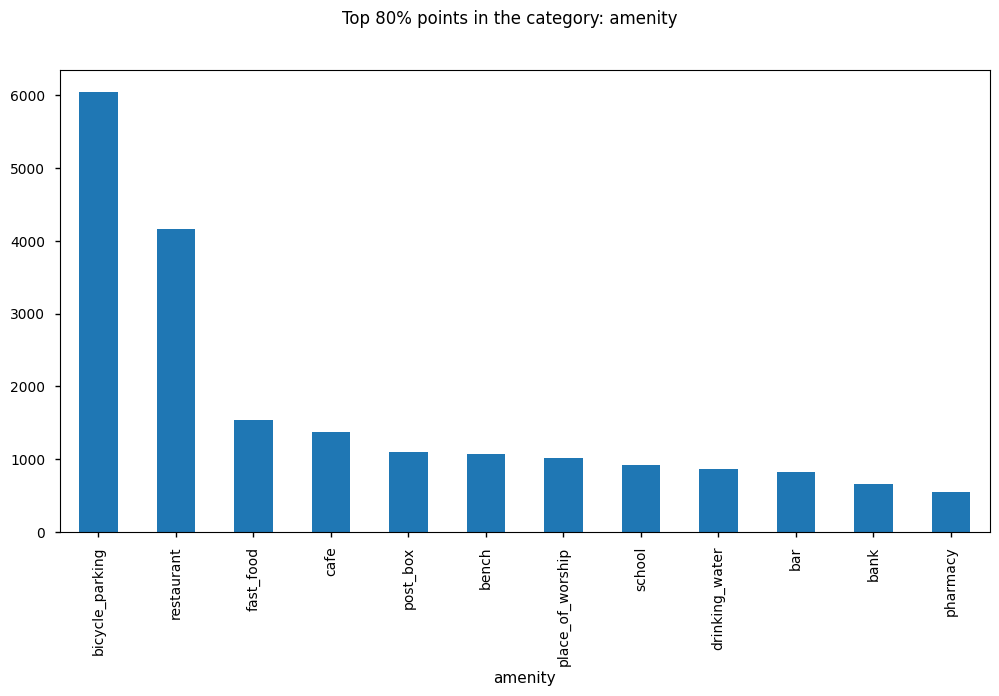

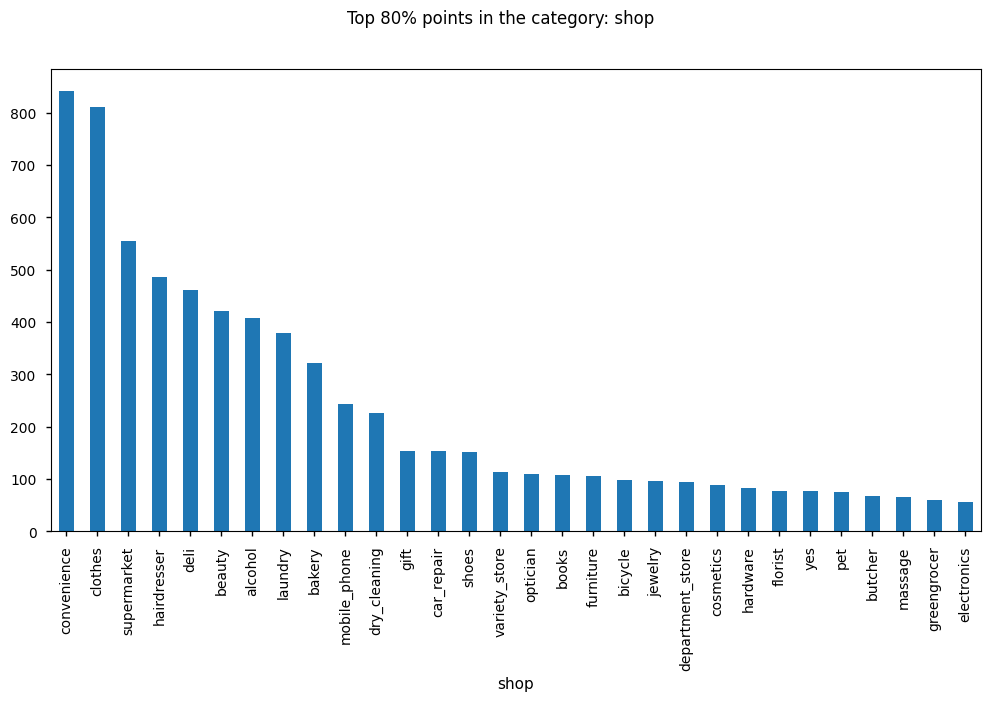

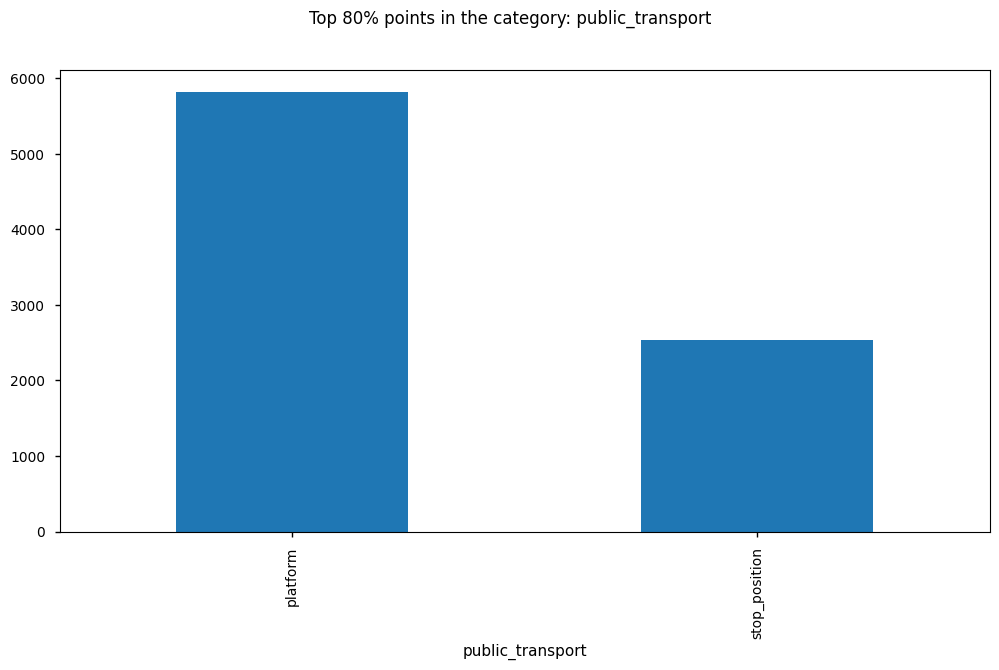

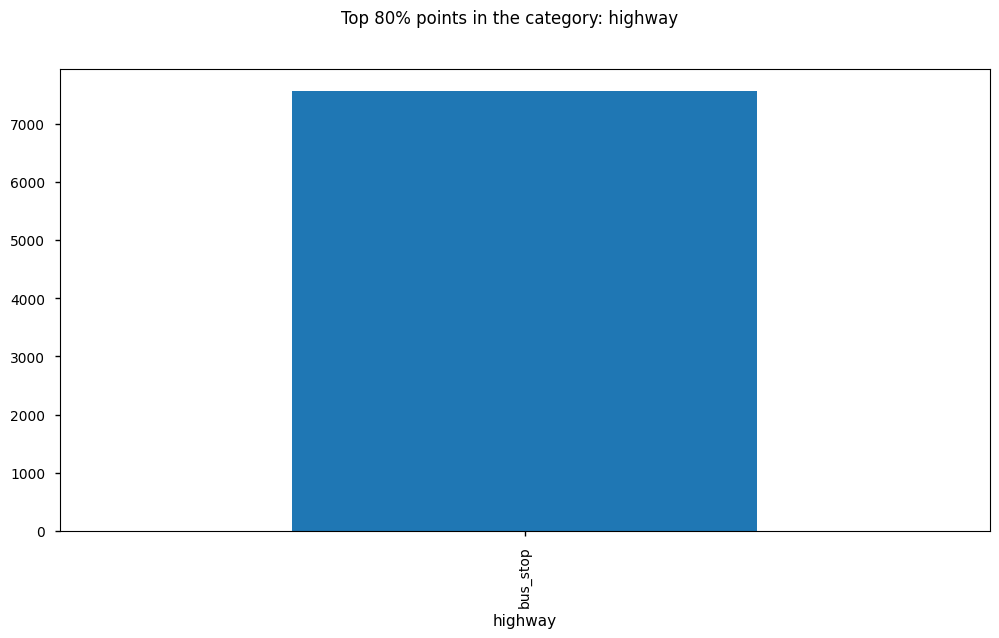

In [19]:
def get_top_perc(series, perc_value=.8):     
   perc = series.cumsum() / series.sum()     
   arg = (perc > perc_value).values.argmax()     
   return series.iloc[:arg+1]

for col in get_categories():
   p = .8
   valc = pois_df[col].value_counts()
   valf = get_top_perc(valc, p)
   fig, ax = plt.subplots()
   valf.plot(kind='bar', ax=ax)
   ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
   fig.suptitle(f"Top {p*100:.0f}% points in the category: {col}")

/var/folders/3c/3_dhwd3j1nsbtxn74nfzthhw0000gn/T/ipykernel_4558/2877819591.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.imshow(x, aspect='auto', cmap=get_cmap(name))


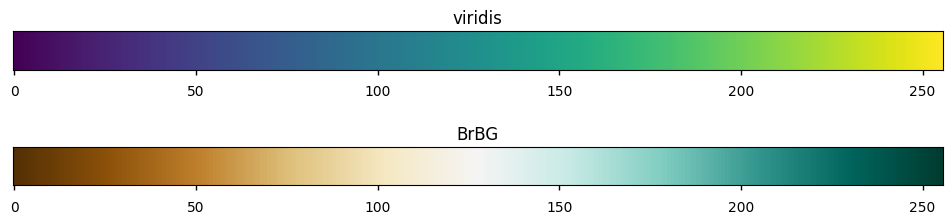

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

x = np.linspace(0, 1, 256)
x = np.vstack((x, x))

fig, axes = plt.subplots(nrows=2, figsize=(12, 2))
plt.subplots_adjust(hspace=2)  # adjust the vertical space between subplots

for ax, name in zip(axes, ['viridis', 'BrBG']):
    ax.imshow(x, aspect='auto', cmap=get_cmap(name))
    ax.grid(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(name)

plt.show()

In [21]:
x[0, :10]

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412])

In [22]:
cmap = plt.get_cmap('viridis') 
cmap(x[0, :10])

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       [0.271305, 0.019942, 0.347269, 1.      ],
       [0.272594, 0.025563, 0.353093, 1.      ],
       [0.273809, 0.031497, 0.358853, 1.      ],
       [0.274952, 0.037752, 0.364543, 1.      ],
       [0.276022, 0.044167, 0.370164, 1.      ],
       [0.277018, 0.050344, 0.375715, 1.      ],
       [0.277941, 0.056324, 0.381191, 1.      ]])

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

class Map:
    def __init__(self, df):
        """Store Dataset with POIs information."""
        self.pois_df = df
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()

    def plot_map(self):
        """Display an image with NY map and return the Axes object."""
        fig, ax = plt.subplots()
        nyc_img = plt.imread('./New_York_City_Map.PNG')
        ax.imshow(nyc_img, zorder=0, extent=[self.long_min,
                                             self.long_max,
                                             self.lat_min,
                                             self.lat_max])
        ax.grid(False)
        return ax

    def plot_pois(self, ax, category, mask):
        """Plot data on specified Axis."""
        df = self.pois_df.loc[mask]

        # Version 1: using pandas
        types = df[category].unique()
        cmap = get_cmap('viridis')
        colors = cmap(np.linspace(0, 1, types.size))
        for i, t in enumerate(types):
            df_t = df.loc[df[category] == t]
            c = [colors[i]] * df_t.shape[0]
            df_t.plot.scatter(x='@lon', y='@lat', ax=ax, c=c, alpha=.6, label=t)

        # Version 2: using seaborn
        # sns.scatterplot(x=df['@lon'], y=df['@lat'], hue=df[category], ax=ax,
        #                 marker='o', s=3, linewidth=0, palette="viridis", legend='full')

        ax.legend()  # show the legend, required by Version 1
        ax.grid(False)
        return ax

/var/folders/3c/3_dhwd3j1nsbtxn74nfzthhw0000gn/T/ipykernel_4558/246153944.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


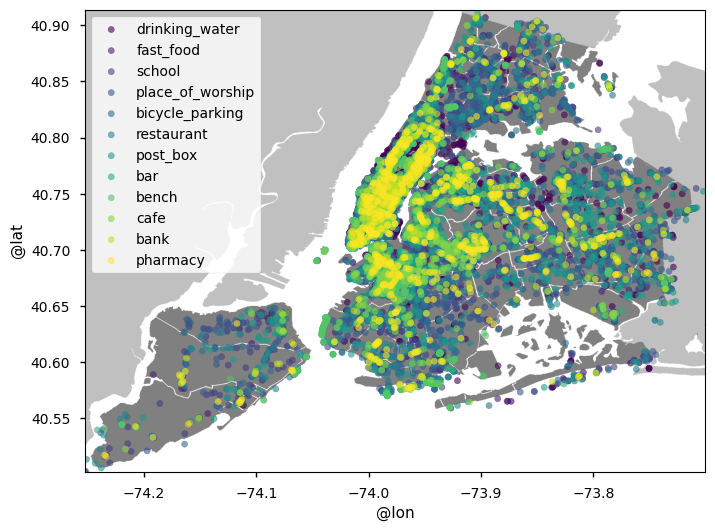

In [24]:
def show_category_on_map(df, column, perc_value):
    """ 
    Plot the New York map with POIs of a specific category. 
    Only the top 'perc_value'% frequent types are plotted. 
    """
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    ny_map = Map(df)
    
    ax = ny_map.plot_map()
    mask = df[column].isin(top_freq.index)
    ny_map.plot_pois(ax, column, mask)

# Assuming pois_df is already defined
show_category_on_map(pois_df, 'amenity', 0.8)

/var/folders/3c/3_dhwd3j1nsbtxn74nfzthhw0000gn/T/ipykernel_4558/246153944.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


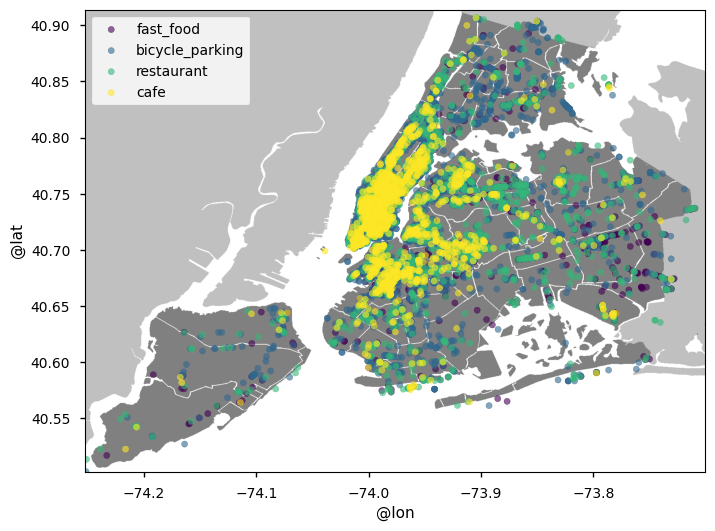

In [25]:
show_category_on_map(pois_df, 'amenity', .5) 

/var/folders/3c/3_dhwd3j1nsbtxn74nfzthhw0000gn/T/ipykernel_4558/246153944.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


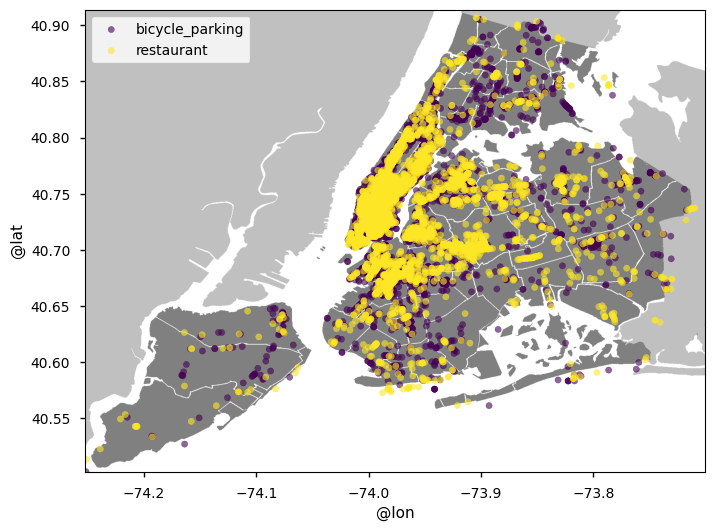

In [26]:
show_category_on_map(pois_df, 'amenity', .3) 

In [27]:
import numpy as np
import pandas as pd

class Cell_converter:
    def __init__(self, df, n_splits):
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        self.n_splits = n_splits

    def plot_grid(self, ax):
        lat_steps = np.linspace(self.lat_min, self.lat_max, self.n_splits + 1)
        long_steps = np.linspace(self.long_min, self.long_max, self.n_splits + 1)
        ax.hlines(lat_steps, self.long_min, self.long_max)
        ax.vlines(long_steps, self.lat_min, self.lat_max)

    def point_to_cell_coord(self, long, lat):
        x = int((long - self.long_min) / (self.long_max - self.long_min) * self.n_splits)
        y = int((lat - self.lat_min) / (self.lat_max - self.lat_min) * self.n_splits)
        return x, y

    def point_to_cell_id(self, long, lat):
        x, y = self.point_to_cell_coord(long, lat)
        return y * self.n_splits + x

# Assuming pois_df is already defined
n_splits = 20
cell_conv = Cell_converter(pois_df, n_splits)

pois_df['cell_id'] = pois_df.apply(lambda row: cell_conv.point_to_cell_id(row['@lon'], row['@lat']), axis=1)
pois_df.head()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
@id,,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN,310
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN,250
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN,337
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN,353
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN,197


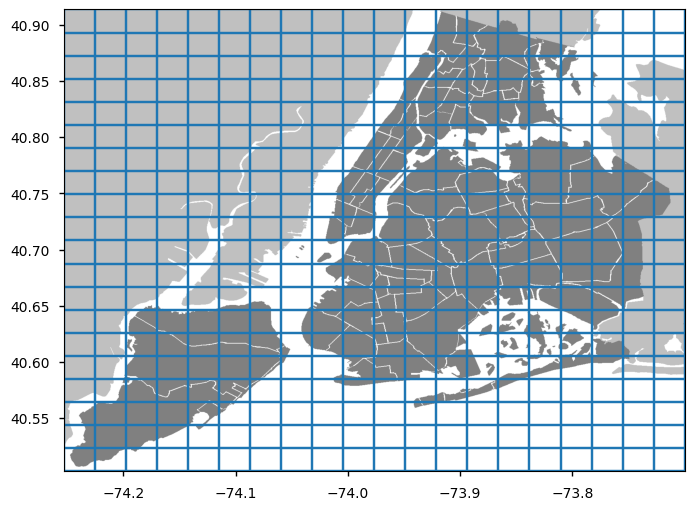

In [28]:
yet_another_map = Map(pois_df)
ax = yet_another_map.plot_map() 
cell_conv.plot_grid(ax) 

In [29]:
def get_df_count(df, column, perc_value):
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    mask = df[column].isin(top_freq.index)
    freq_df = df.loc[mask]
    
    # For each cell_id, count the number of POIs for each type
    count_dframe = []
    for cell_id in range(n_splits**2):
        count_vals = freq_df.loc[freq_df['cell_id'] == cell_id][column].value_counts()
        count_vals.name = cell_id
        count_dframe.append(count_vals)
    
    cells_features_df = pd.DataFrame(count_dframe)
    cells_features_df = cells_features_df.fillna(0)
    return cells_features_df

In [30]:
amenities_df = get_df_count(pois_df, 'amenity', .6) 
amenities_df.head()

amenity,restaurant,post_box,fast_food,bicycle_parking,cafe,bench
0,2.0,2.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
shops_df = get_df_count(pois_df, 'shop', .6) 
shops_df.head()

shop,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
final_df = pd.concat([amenities_df, shops_df], axis=1)

In [33]:
final_corr = final_df.corr() 
final_corr.head() 


,restaurant,post_box,fast_food,bicycle_parking,cafe,bench,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
restaurant,1.000000,0.738146,0.892643,0.933327,0.977129,0.325605,0.854280,0.698709,0.748171,0.893299,0.897885,0.934591,0.641513,0.533456,0.702188,0.527927,0.697886,0.779390
post_box,0.738146,1.000000,0.791383,0.757908,0.751239,0.464872,0.831700,0.732534,0.572624,0.854463,0.640424,0.730414,0.744983,0.700626,0.764960,0.669046,0.747977,0.802623
fast_food,0.892643,0.791383,1.000000,0.823712,0.931877,0.463410,0.762383,0.707077,0.808271,0.856165,0.790148,0.759500,0.726217,0.557794,0.758824,0.574192,0.776886,0.822514
bicycle_parking,0.933327,0.757908,0.823712,1.000000,0.922268,0.381228,0.858209,0.633704,0.662442,0.873462,0.839809,0.888446,0.673453,0.522363,0.745809,0.490781,0.607225,0.793769
cafe,0.977129,0.751239,0.931877,0.922268,1.000000,0.407526,0.813572,0.694446,0.786491,0.901696,0.875035,0.874180,0.657689,0.508593,0.732542,0.480233,0.690048,0.813883


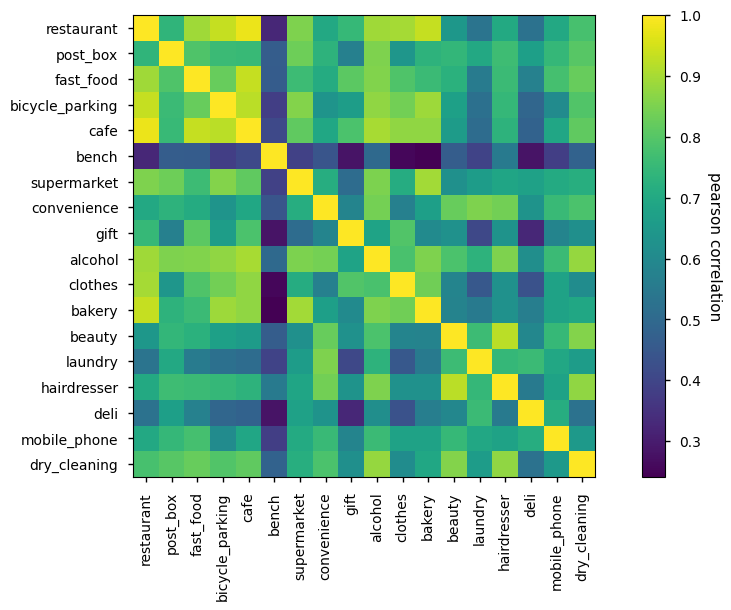

In [34]:
# Version 1 
fig, ax = plt.subplots()
im = ax.imshow(final_corr)
ax.set_xticks(np.arange(final_corr.columns.size))
ax.set_yticks(np.arange(final_corr.columns.size))
ax.set_xticklabels(final_corr.columns)
ax.set_yticklabels(final_corr.columns)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va="center", rotation_mode="anchor")  # rotate labels on x-axis
cbar = ax.figure.colorbar(im, ax=ax)
_ = cbar.ax.set_ylabel('pearson correlation', rotation=-90, va="bottom")

# Version 2 
# sns.heatmap(final_corr) 

Exercise 2

In [36]:
df = pd.read_csv('831394006_T_ONTIME.csv', parse_dates=["FL_DATE"]).rename(columns=str.lower) 

In [37]:
df.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,...,arr_time,arr_delay,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 32
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,1809.0,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,2040.0,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,1749.0,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,642.0,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0,NaN


In [38]:
df.describe()

,fl_date,airline_id,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,dest_airport_id,dest_airport_seq_id,dest_city_market_id,crs_dep_time,...,crs_arr_time,arr_time,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 32
count,450017,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,...,450017.000000,440746.000000,439645.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000,0.0
mean,2017-01-15 22:38:34.552561152,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,12698.024626,1.269805e+06,31738.404640,1327.757407,...,1506.278285,1487.332958,6.954484,0.019746,20.308836,3.368857,15.742495,0.079745,24.947492,NaN
min,2017-01-01 00:00:00,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,...,1.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2017-01-08 00:00:00,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,11292.000000,1.129202e+06,30647.000000,917.000000,...,1120.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2017-01-16 00:00:00,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,12892.000000,1.289204e+06,31454.000000,1321.000000,...,1529.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,NaN
75%,2017-01-24 00:00:00,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,14057.000000,1.405702e+06,32467.000000,1730.000000,...,1921.000000,1921.000000,11.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000,NaN
max,2017-01-31 00:00:00,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,...,2359.000000,2400.000000,1944.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000,NaN
std,NaN,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,1534.246611,1.534244e+05,1285.791081,481.548320,...,501.853851,523.821795,49.595992,0.139126,60.649157,27.809756,32.328181,2.896287,47.850860,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fl_date                450017 non-null  datetime64[ns]
 1   unique_carrier         450017 non-null  object        
 2   airline_id             450017 non-null  int64         
 3   tail_num               449378 non-null  object        
 4   fl_num                 450017 non-null  int64         
 5   origin_airport_id      450017 non-null  int64         
 6   origin_airport_seq_id  450017 non-null  int64         
 7   origin_city_market_id  450017 non-null  int64         
 8   origin                 450017 non-null  object        
 9   origin_city_name       450017 non-null  object        
 10  dest_airport_id        450017 non-null  int64         
 11  dest_airport_seq_id    450017 non-null  int64         
 12  dest_city_market_id    450017 non-null  int6

In [40]:
df = df.drop("unnamed: 32", axis=1)

In [41]:
df.unique_carrier.unique(), df.unique_carrier.unique().size

(array(['AA', 'B6', 'EV', 'HA', 'NK', 'OO', 'UA', 'VX', 'AS', 'WN', 'DL',
        'F9'], dtype=object),
 12)

In [42]:
distinct_airports = pd.concat([df["origin"], df["dest"]]) 
print(f"First ten airports: {distinct_airports.unique()[:10]}. Size: {distinct_airports.unique().size}")

First ten airports: ['JFK' 'LAX' 'DFW' 'OGG' 'HNL' 'SFO' 'ORD' 'MIA' 'IAH' 'BOS']. Size: 298


In [43]:
df[["origin", "dest"]]

,origin,dest
0,JFK,LAX
1,LAX,JFK
2,LAX,JFK
3,DFW,HNL
4,OGG,DFW
...,...,...
450012,FLL,MSP
450013,MSP,FLL
450014,ATL,PHL
450015,FLL,ATL


In [44]:
df.fl_date.min(), df.fl_date.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-01-31 00:00:00'))

In [45]:
print('Shape before:', df.shape) 
df = df.loc[df.cancelled == 0] 
print('Shape after:', df.shape)

Shape before: (450017, 32)
Shape after: (441131, 32)


In [46]:
df_by_carrier = df.groupby('unique_carrier') 
df_count = df_by_carrier['fl_date'].count()
df_count

unique_carrier
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
       ...  
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: fl_date, Length: 12, dtype: int64

In [47]:
df_by_carrier[['carrier_delay',                'weather_delay',                'nas_delay',                'security_delay',                'late_aircraft_delay']].mean()

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
unique_carrier,,,,,
AA,18.736410,2.352168,15.370026,0.178156,18.742267
AS,11.736505,3.820850,18.615047,0.169028,19.189946
B6,20.297641,1.436562,15.223725,0.312820,29.282627
DL,30.858959,9.572160,16.836252,0.033901,21.964020
EV,36.329407,1.368504,15.794439,0.000000,31.725109
...,...,...,...,...,...
NK,9.080825,0.732499,43.840041,0.035171,12.137978
OO,23.495640,4.633053,15.186582,0.100759,31.316244
UA,21.436417,2.568226,21.186162,0.016759,24.592458


In [48]:
df['weekday'] = df['fl_date'].dt.dayofweek 
df['weekday'].head() 

0    6
1    6
2    6
3    6
4    6
Name: weekday, dtype: int32

In [49]:
df['deltadelay'] = df['arr_delay'] - df['dep_delay'] 
df['deltadelay'].head()

0    -4.0
1     8.0
2    -9.0
3    20.0
4    42.0
Name: deltadelay, dtype: float64

<Axes: title={'center': 'arr_delay'}, xlabel='weekday'>

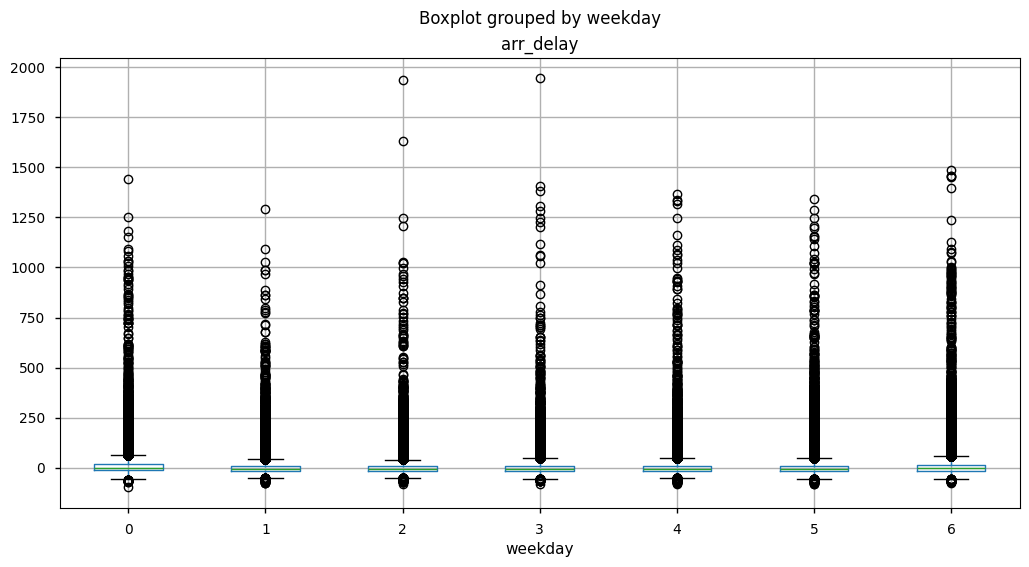

In [50]:
df.boxplot(by='weekday', column='arr_delay')

<Axes: title={'center': 'arr_delay'}, xlabel='weekday'>

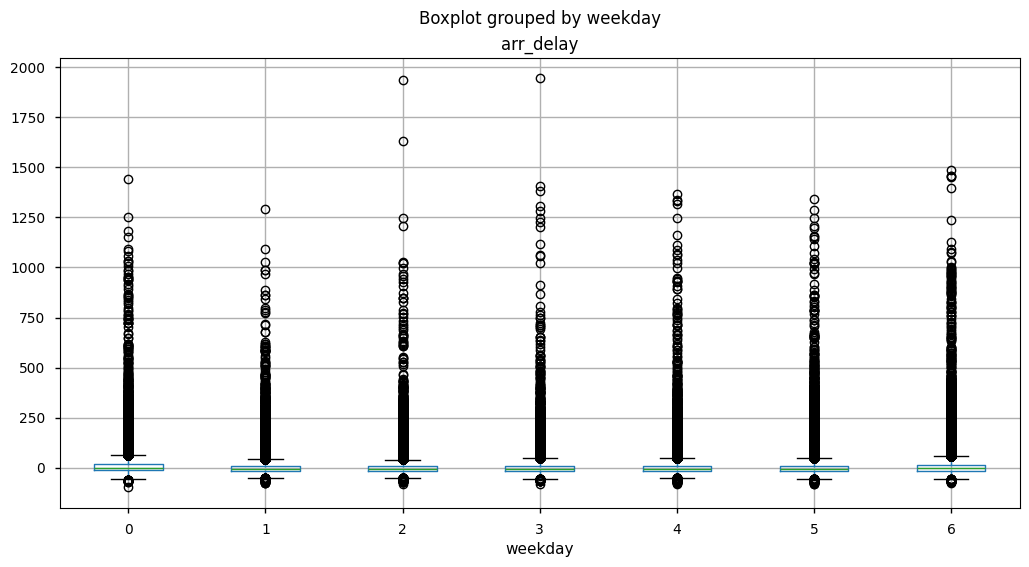

In [51]:
df.boxplot(by='weekday', column='arr_delay')

<Axes: title={'center': 'arr_delay'}, xlabel='weekday'>

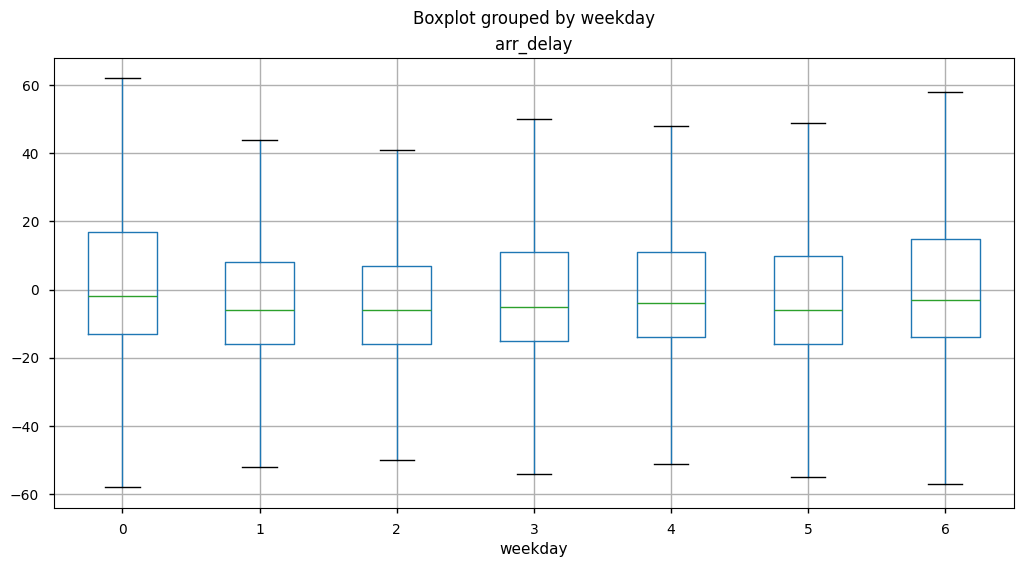

In [52]:
df.boxplot(by='weekday', column='arr_delay', showfliers=False)

In [54]:
we_delay = df.loc[df.weekday > 4].groupby('unique_carrier').arr_delay.mean() 
wd_delay = df.loc[df.weekday <= 4].groupby('unique_carrier').arr_delay.mean() 
we_delay.name = "weekend delay" 
wd_delay.name = "working days delay"

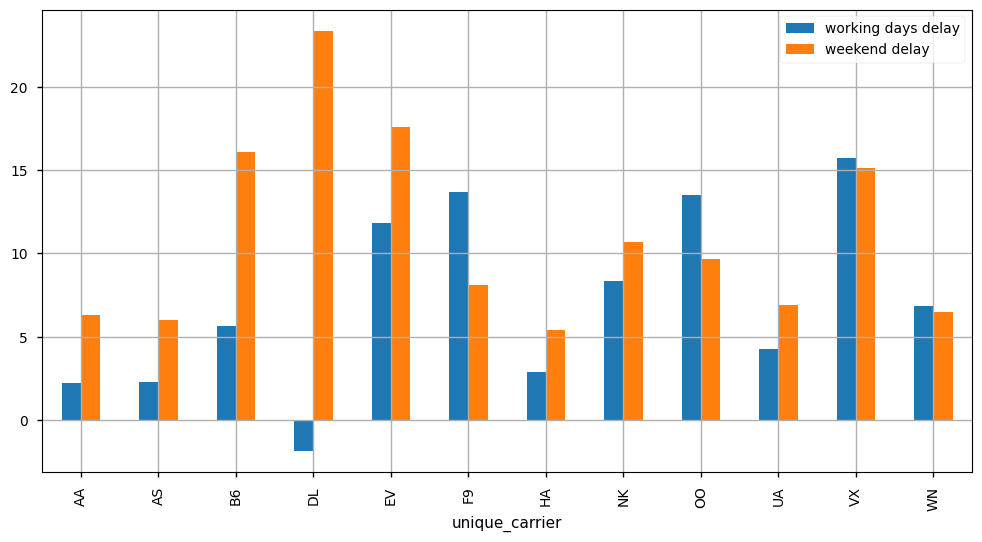

In [55]:
ax = pd.concat([wd_delay, we_delay], axis=1).plot.bar() 
ax.grid(True)

In [56]:
multi_df = df.set_index(['unique_carrier', 'origin', 'dest', 'fl_date']).sort_index() 
multi_df[multi_df.columns[:4]].head()

airline_id tail_num  fl_num  \
unique_carrier origin dest fl_date                                   
AA             ABQ    DFW  2017-01-01       19805   N4XSAA    1282   
                           2017-01-01       19805   N3NRAA    2611   
                           2017-01-01       19805   N4WNAA    2402   
                           2017-01-02       19805   N4XKAA    2611   
                           2017-01-02       19805   N4XBAA    2402   

                                       origin_airport_id  
unique_carrier origin dest fl_date                        
AA             ABQ    DFW  2017-01-01              10140  
                           2017-01-01              10140  
                           2017-01-01              10140  
                           2017-01-02              10140  
                           2017-01-02              10140

In [57]:
multi_df.loc[(['AA', 'DL'], ['LAX']), ['dep_time', 'dep_delay']]

dep_time  dep_delay
unique_carrier origin dest fl_date                        
AA             LAX    ATL  2017-01-01    1051.0       16.0
                           2017-01-01    1747.0      137.0
                           2017-01-02    1548.0       18.0
                           2017-01-02    2230.0       40.0
                           2017-01-02    1055.0       20.0
...                                         ...        ...
DL             LAX    TPA  2017-01-26    1146.0        1.0
                           2017-01-27    1137.0       -3.0
                           2017-01-29    1149.0        4.0
                           2017-01-30    1142.0       -3.0
                           2017-01-31    1206.0       21.0

[5437 rows x 2 columns]

In [58]:
# fw_df = multi_df.loc[(:, :, 'LAX', '2017-01-01':'2017-01-08'), :] # not allowed  
fw_df = multi_df.loc[(slice(None), slice(None), 'LAX', slice('2017-01-01','2017-01-08')), :] 

In [59]:
fw_df = multi_df.loc[pd.IndexSlice[:, :, 'LAX', '2017-01-01':'2017-01-08'], :]

In [60]:
fw_df.groupby('fl_num')['arr_delay'].mean()

fl_num
1        0.000000
2       60.000000
4       11.625000
5        2.875000
7       16.750000
          ...    
6344    47.000000
6354    60.000000
6522    49.666667
6563    -8.000000
6710    10.000000
Name: arr_delay, Length: 1105, dtype: float64

In [62]:
cfd = pd.pivot_table(df, values='fl_num', index='unique_carrier', columns='weekday', aggfunc='count') 
cfd

weekday,0,1,2,3,4,5,6
unique_carrier,,,,,,,
AA,12035,11457,9651,9854,9820,7905,11430
AS,2440,2261,1806,1935,1953,1762,2297
B6,4063,3942,3143,3258,3169,2643,3859
DL,12157,11512,9248,9695,9521,6492,10406
EV,5935,5649,4627,4923,4774,2905,5065
...,...,...,...,...,...,...,...
NK,1954,1970,1616,1610,1563,1470,1946
OO,8321,7912,6413,6631,6667,4913,7409
UA,7498,6883,5384,5956,5920,3964,6566


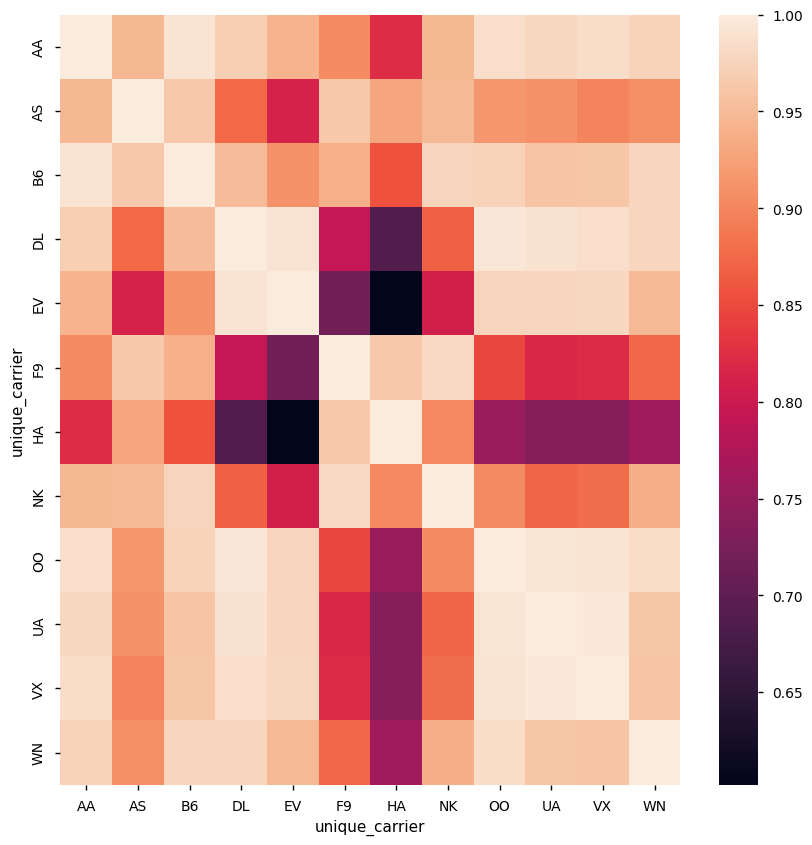

In [63]:
plt.figure(figsize=(10,10)) 
_ = sns.heatmap(cfd.T.corr())

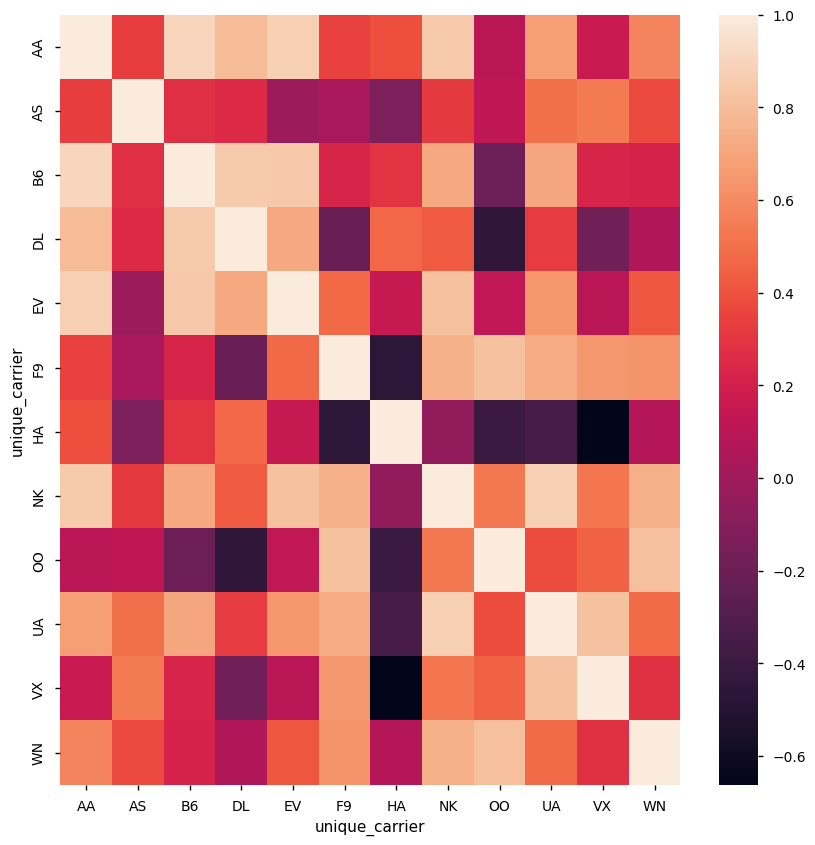

In [64]:
plt.figure(figsize=(10,10)) 
_ = sns.heatmap(pd.pivot_table(df, values='arr_delay', index='unique_carrier', columns='weekday', aggfunc='mean').T.corr())

In [65]:
mask = df.unique_carrier.isin(["HA", "DL", "AA", "AS"]) 
dcw = pd.pivot_table(df.loc[mask], values='deltadelay', index='unique_carrier', columns='weekday', aggfunc='mean') 
dcw 

weekday,0,1,2,3,4,5,6
unique_carrier,,,,,,,
AA,-3.576209,-4.621619,-4.601184,-4.091436,-3.553686,-4.558771,-3.747053
AS,-1.690789,-1.625446,-1.889198,-2.130705,-2.624551,-3.453872,0.542632
DL,-8.913563,-10.211625,-10.544913,-10.604603,-9.623199,-5.979988,-7.001644
HA,0.258359,0.307772,0.759189,0.390762,0.746528,1.330508,1.207066


<Axes: xlabel='weekday'>

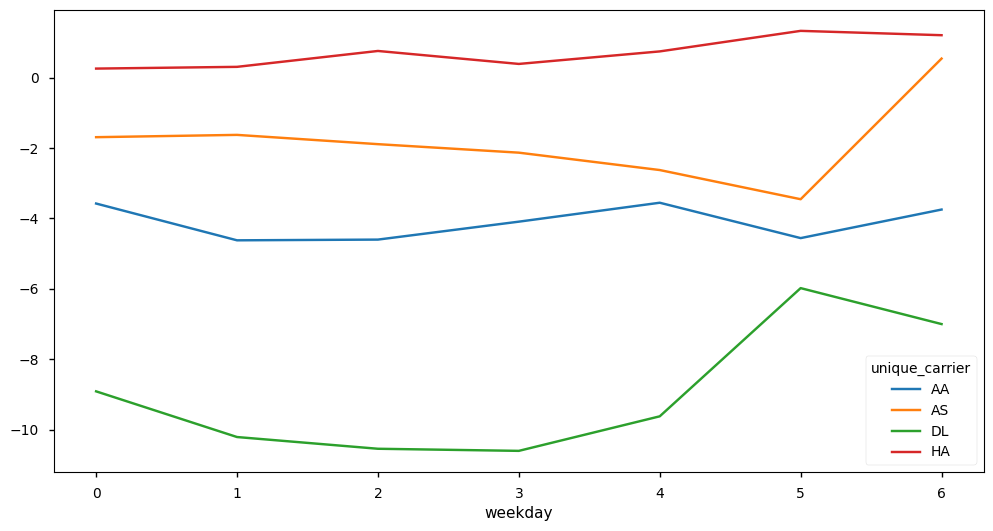

In [66]:
dcw.T.plot()